Original data shape: (1000000, 9)
Number of duplicate rows (all occurrences): 0
Data shape after dropping duplicates: (1000000, 9)
Sensor Reading - Mean: 100.00, Median: 100.01, Mode: 104.38
Control Value  - Mean: 50.01, Median: 50.00, Mode: 50.00
Combined Value - Mean: 150.01, Median: 149.96, Mode: 150.78


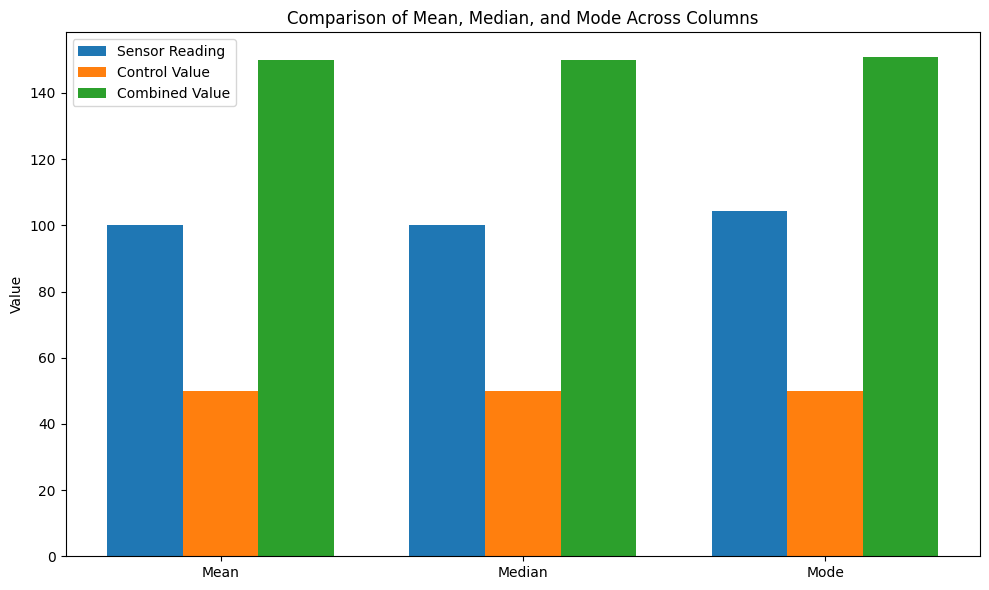

CPU usage before processing: 2.60%
CPU usage after processing: 2.20%
Total runtime: 4.09 seconds


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil

# Start the runtime measurement
start_time = time.time()
cpu_before = psutil.cpu_percent(interval=1)

# Data Ingestion: load the CSV file into a DataFrame
# Update the filename from the placeholder "data.csv" to your actual file name ("train.csv")
df = pd.read_csv('sensor_data.csv')
print(f"Original data shape: {df.shape}")

# Improved Duplicate Detection:
# Identify ALL duplicate rows (even if every occurrence is a duplicate)
all_duplicates = df[df.duplicated(keep=False)]
print(f"Number of duplicate rows (all occurrences): {all_duplicates.shape[0]}")
# Optionally, you can print the duplicate rows to inspect them:
# print(all_duplicates)

# Remove duplicate rows (keeping only the first occurrence)
df.drop_duplicates(inplace=True)
print(f"Data shape after dropping duplicates: {df.shape}")

# For the purpose of this challenge we assume two numerical columns exist, e.g., 'sensor_reading' and 'control_value'.
# (If your data file has different column names, adjust accordingly.)
# Create a new derived column "combined_value" by summing the two columns.
df['combined_value'] = df['sensor_reading'] + df['control_value']

# Define a helper function to compute mean, median, and mode
def compute_stats(column):
    mean_val = df[column].mean()
    median_val = df[column].median()
    mode_series = df[column].mode()
    mode_val = mode_series.iloc[0] if not mode_series.empty else np.nan
    return mean_val, median_val, mode_val

# Calculate statistics for each of the three columns
sensor_stats = compute_stats('sensor_reading')
control_stats = compute_stats('control_value')
combined_stats = compute_stats('combined_value')

# Print the computed statistics
print("Sensor Reading - Mean: {:.2f}, Median: {:.2f}, Mode: {:.2f}".format(*sensor_stats))
print("Control Value  - Mean: {:.2f}, Median: {:.2f}, Mode: {:.2f}".format(*control_stats))
print("Combined Value - Mean: {:.2f}, Median: {:.2f}, Mode: {:.2f}".format(*combined_stats))

# Visualization: Use a grouped bar chart to compare the statistics
categories = ['Mean', 'Median', 'Mode']
stats_values = {
    'Sensor Reading': [sensor_stats[0], sensor_stats[1], sensor_stats[2]],
    'Control Value':  [control_stats[0], control_stats[1], control_stats[2]],
    'Combined Value': [combined_stats[0], combined_stats[1], combined_stats[2]]
}

x = np.arange(len(categories))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, stats_values['Sensor Reading'], width, label='Sensor Reading')
rects2 = ax.bar(x, stats_values['Control Value'], width, label='Control Value')
rects3 = ax.bar(x + width, stats_values['Combined Value'], width, label='Combined Value')

ax.set_ylabel('Value')
ax.set_title('Comparison of Mean, Median, and Mode Across Columns')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

# End the runtime measurement
cpu_after = psutil.cpu_percent(interval=1)
end_time = time.time()

print("CPU usage before processing: {:.2f}%".format(cpu_before))
print("CPU usage after processing: {:.2f}%".format(cpu_after))
print("Total runtime: {:.2f} seconds".format(end_time - start_time))